## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = sns.load_dataset('diamonds')
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
df.shape

(53940, 10)

<Axes: >

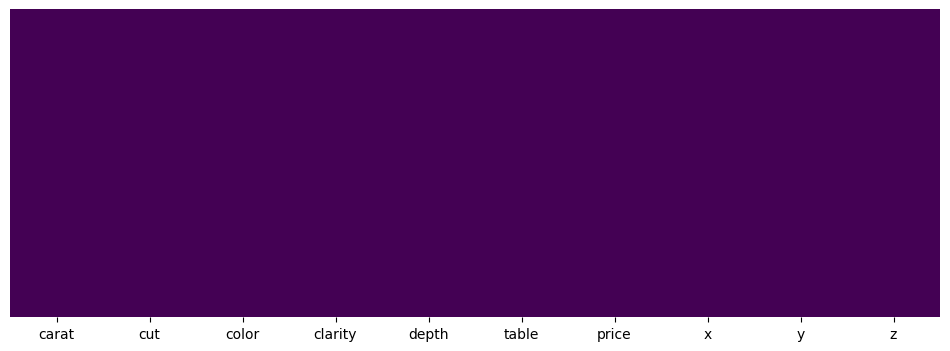

In [5]:
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)

## Data Visualization

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

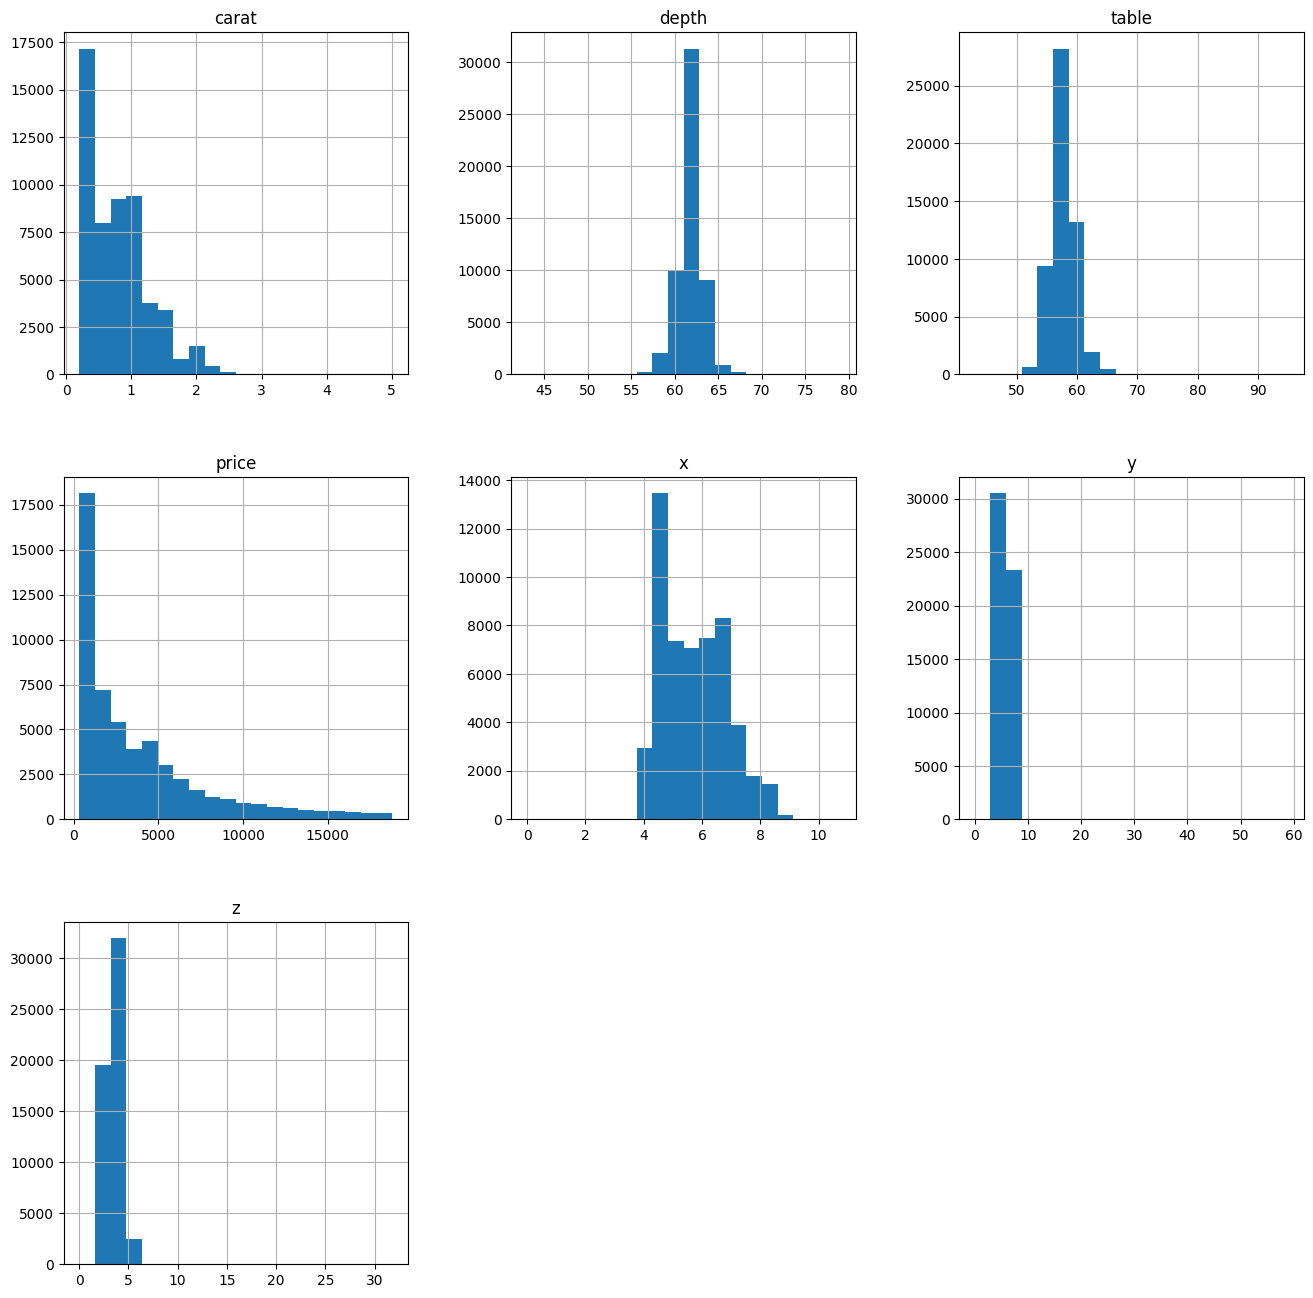

In [6]:
df.hist(figsize=(16, 16), bins=20)

In [7]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.80,0.47,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.75,1.43,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.46,2.23,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.80,3989.44,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.73,1.12,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.73,1.14,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.54,0.71,0.0,2.91,3.53,4.04,31.80


In [8]:
from sklearn.preprocessing import StandardScaler

to_scale = ['depth', 'table', 'x', 'y', 'z']

std = StandardScaler()
scaled_df = std.fit(df[to_scale])
df[to_scale] = pd.DataFrame(std.transform(df[to_scale]), columns=to_scale)

array([[<Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

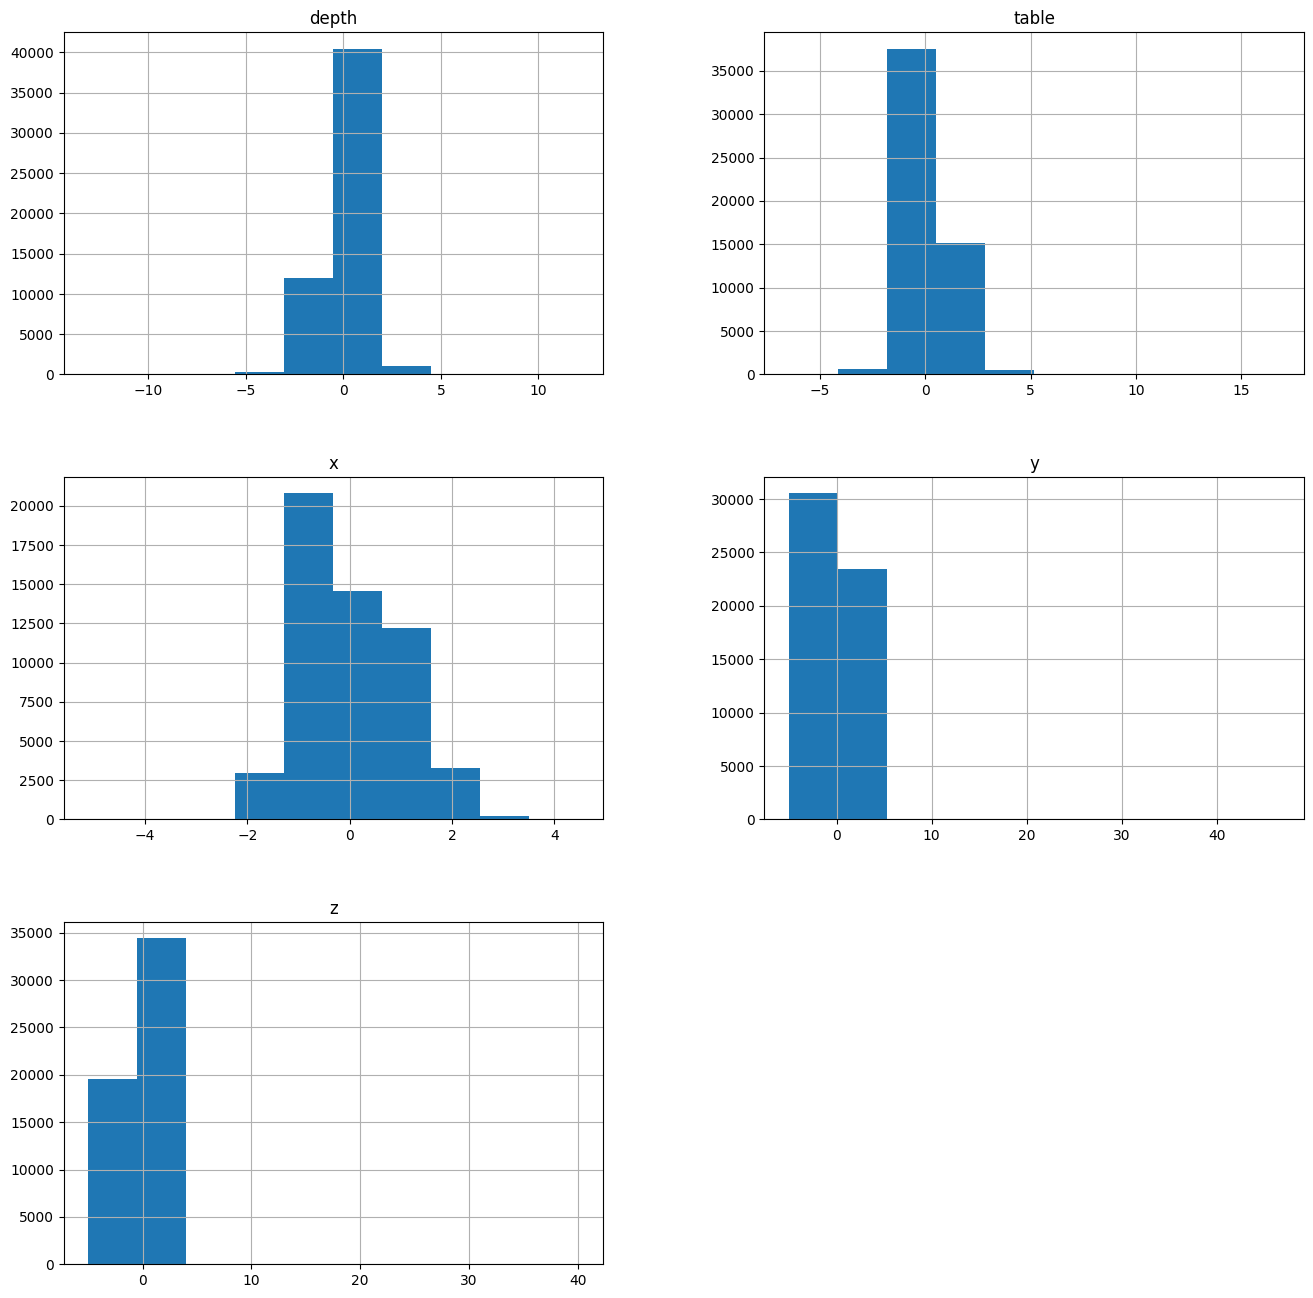

In [9]:
df[to_scale].hist(figsize=(16, 16))

In [10]:
df = sns.load_dataset('diamonds')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'carat'}>]], dtype=object)

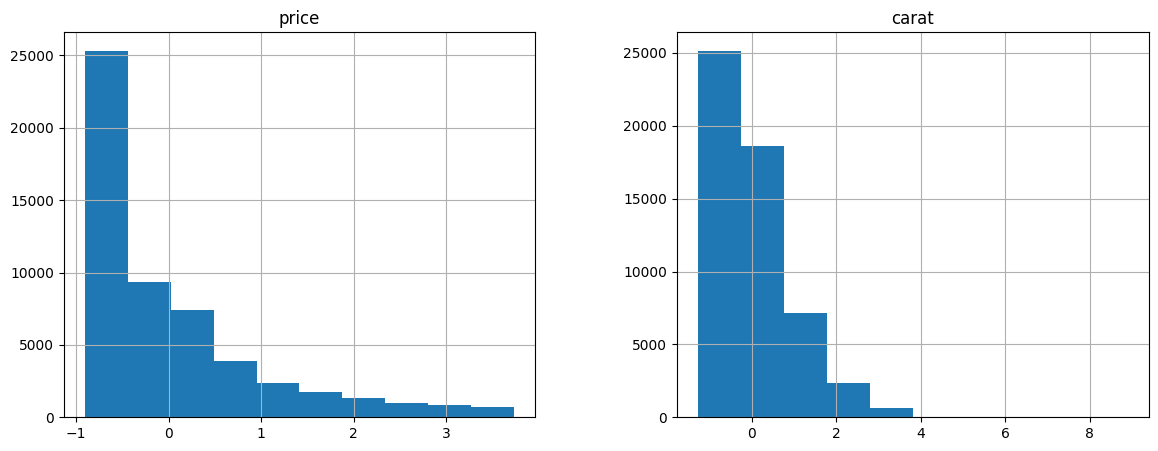

In [12]:
df[['price','carat']] = pd.DataFrame(std.fit_transform(df[['price','carat']]), columns=['price','carat'])
df[['price','carat']].hist(figsize=(14, 5))

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'carat'}>]], dtype=object)

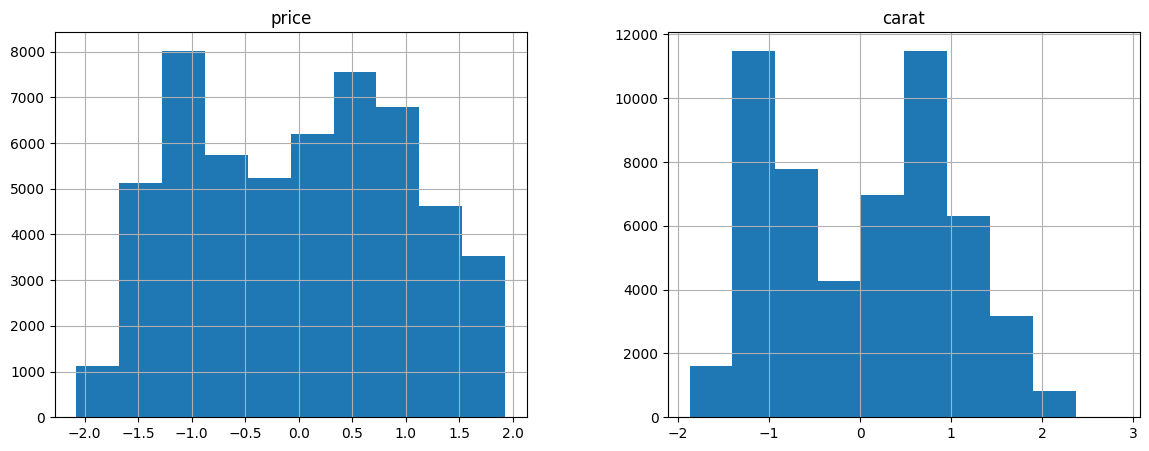

In [13]:
from sklearn.preprocessing import PowerTransformer

df = sns.load_dataset('diamonds')

to_norm = []
pow = PowerTransformer()

df[['price','carat']] = pd.DataFrame(pow.fit_transform(df[['price','carat']]), columns=['price','carat'])
df[['price','carat']].hist(figsize=(14, 5))